In [129]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# train 데이터

In [143]:
!apt-get -qq -y install fonts-nanum
!fc-cache -fv
!rm -rf /root/.cache/matplotlib

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

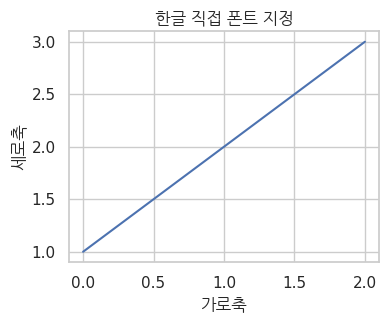

In [149]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(4,3))
plt.plot([1, 2, 3])
plt.title('한글 직접 폰트 지정', fontproperties=fontprop)
plt.xlabel('가로축', fontproperties=fontprop)
plt.ylabel('세로축', fontproperties=fontprop)
plt.show()

In [5]:
import pandas as pd

pd.set_option('display.max_rows', None)
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.tsv', sep="\t")
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [17]:
# 한글 컬럼명 변경
old_cols = train.columns
new_cols = ['거래번호','상품명','상태','카테고리','브랜드명','가격','배송비_부담','설명']

train = train.rename(columns=dict(zip(old_cols, new_cols)))
train.head()

,거래번호,상품명,상태,카테고리,브랜드명,가격,배송비_부담,설명
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [133]:
# 결측치 확인
train.isna().sum()

,0
거래번호,0
상품명,0
상태,0
카테고리,6327
브랜드명,632682
가격,0
배송비_부담,0
설명,6


In [8]:
train[train['카테고리'].isna()]

,거래번호,상품명,상태,카테고리,브랜드명,가격,배송비_부담,설명
122,122,Bundle,3,NaN,NaN,59.0,0,Sizes and info of clothes can be found on thei...
155,155,3 Nora Roberts Books,3,NaN,NaN,10.0,1,For aferg16.
258,258,ACER Laptop,5,NaN,NaN,14.0,0,"Powers on, no screen display, no external dama..."
984,984,AUTHENTIC BRWN MICHAEL KORS MAKEUP STAIN,4,NaN,Michael Kors,18.0,0,No description yet
1185,1185,Teenage Mutant Ninja Turtle Van/ Extras,3,NaN,Nickelodeon,9.0,0,"Teenage Mutant Ninja Turtle Van, April O'Neil ..."
...,...,...,...,...,...,...,...,...
1481249,1481249,Only For Erin. Do Not Buy,3,NaN,NaN,31.0,0,No description yet
1481750,1481750,American Eagle Jeggings,2,NaN,American Eagle,17.0,0,Worn a couple of time Size 4
1482252,1482252,Bundle For All Honey :),3,NaN,NaN,40.0,0,No description yet
1482443,1482443,HOLD 14g Purple Prong Nipple Bars Rings,1,NaN,NaN,22.0,1,14g Purple Prong Set Nipple Bars Rings [surgic...


In [15]:
train2 = train[train['카테고리'].isna()].copy()
train2

,거래번호,상품명,상태,카테고리,브랜드명,가격,배송비_부담,설명
122,122,Bundle,3,NaN,NaN,59.0,0,Sizes and info of clothes can be found on thei...
155,155,3 Nora Roberts Books,3,NaN,NaN,10.0,1,For aferg16.
258,258,ACER Laptop,5,NaN,NaN,14.0,0,"Powers on, no screen display, no external dama..."
984,984,AUTHENTIC BRWN MICHAEL KORS MAKEUP STAIN,4,NaN,Michael Kors,18.0,0,No description yet
1185,1185,Teenage Mutant Ninja Turtle Van/ Extras,3,NaN,Nickelodeon,9.0,0,"Teenage Mutant Ninja Turtle Van, April O'Neil ..."
...,...,...,...,...,...,...,...,...
1481249,1481249,Only For Erin. Do Not Buy,3,NaN,NaN,31.0,0,No description yet
1481750,1481750,American Eagle Jeggings,2,NaN,American Eagle,17.0,0,Worn a couple of time Size 4
1482252,1482252,Bundle For All Honey :),3,NaN,NaN,40.0,0,No description yet
1482443,1482443,HOLD 14g Purple Prong Nipple Bars Rings,1,NaN,NaN,22.0,1,14g Purple Prong Set Nipple Bars Rings [surgic...


In [14]:
train2[train2['브랜드명'].notnull()]

,거래번호,상품명,상태,카테고리,브랜드명,가격,배송비_부담,설명
984,984,AUTHENTIC BRWN MICHAEL KORS MAKEUP STAIN,4,NaN,Michael Kors,18.0,0,No description yet
1185,1185,Teenage Mutant Ninja Turtle Van/ Extras,3,NaN,Nickelodeon,9.0,0,"Teenage Mutant Ninja Turtle Van, April O'Neil ..."
1274,1274,Black Ribbed Off-the-Shoulder Crop Top,2,NaN,Urban Outfitters,15.0,0,From the silence + noise brand sold at Urban O...
1320,1320,Nice Condition Pet Escort,2,NaN,PetSafe,12.0,0,Nice condition I will wipe down before selling
1739,1739,SchoolWear Uniform Pants Bugle Boy,2,NaN,Bugle Boy,5.0,1,Selling Kids Pant celebrate the back to school...
...,...,...,...,...,...,...,...,...
1479167,1479167,Steve Madden Black Heels,3,NaN,Steve Madden,24.0,0,Please look at the photos before purchasing
1480098,1480098,Nike Slides *On hold*,3,NaN,Nike,14.0,0,Worn but not a lot
1480224,1480224,2xl Amelia Lularoe,2,NaN,LuLaRoe,50.0,1,New without tags. Only tried on. Only the dres...
1481750,1481750,American Eagle Jeggings,2,NaN,American Eagle,17.0,0,Worn a couple of time Size 4


### 카테고리 결측치 해결해볼 수 있는 아이디어
1. 브랜드명이 있을 때
- 동일한 브랜드에 속해있는 대/중분류를 추론해서 임시로 카테고리를 생성하는 알고리즘 적용
- 이 때, 대/중분류를 다양하게 보유하고 있는 브랜드라면 상품명과 상품 설명에서 추가적으로 공부할 수 있는 알고리즘이 있는지 찾아보기.....

2. 브랜드명이 없을 때
- 상품명과 상품 설명에서 브랜드명이 있는지 확인 후 찾아넣고, 동일한 브랜드에 속해있는 대/중분류를 추론해서 임시로 카테고리를 생성하는 알고리즘 적용
- 이때도 대/중분류가 다양하게 보유하고 있는 브랜드라면 알고리즘 더 찾아보기...

In [134]:
train['카테고리'].str.count('/').max() # 5개까지 존재함

4.0

In [18]:
# 상품 카테고리를 분리하여 상품군을 정리함
category = train['카테고리'].str.split('/', expand=True)
train['대분류']=category[0]
train['중분류']=category[1]
train['소분류1']=category[2]
train['소분류2']=category[3]
train['소분류3']=category[4]
train.head()

,거래번호,상품명,상태,카테고리,브랜드명,가격,배송비_부담,설명,대분류,중분류,소분류1,소분류2,소분류3
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,None,None
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,None,None
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,None,None
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,None,None
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,None,None


In [21]:
train[['대분류','중분류','브랜드명']].value_counts().head()

대분류          중분류                        브랜드명             
Women        Athletic Apparel           PINK                 15169
             Underwear                  Victoria's Secret    14449
Electronics  Video Games & Consoles     Nintendo             13616
             Cell Phones & Accessories  Apple                13411
Women        Athletic Apparel           Nike                 12306
Name: count, dtype: int64

In [137]:
train['브랜드명'].value_counts().head()

,count
브랜드명,
PINK,54088
Nike,54043
Victoria's Secret,48036
LuLaRoe,31024
Apple,17322


In [36]:
brand_list = train['브랜드명'].unique()
brand_list

array([nan, 'Razer', 'Target', ..., 'Astroglide', 'Cumberland Bay',
       'Kids Only'], dtype=object)

브랜드명을 매칭할 수 있는 함수를 만들고 브랜드명 결측치를 채워볼 예정...

In [37]:
# 카테고리와 브랜드명, 상태값의 평균, 중앙값, 표준편차 확인
group = ['대분류', '중분류', '소분류1', '브랜드명', '상태']

price_stats = (train.groupby(group)['가격'].agg(['mean','median','std','count']).reset_index())
price_stats_count_filter = price_stats[price_stats['count'] >= 2]
price_stats_count_filter.head()

,대분류,중분류,소분류1,브랜드명,상태,mean,median,std,count
0,Beauty,Bath & Body,Bath,% Pure,1,5.500000,5.5,0.707107,2
2,Beauty,Bath & Body,Bath,Arbonne,1,16.500000,18.5,8.346656,4
5,Beauty,Bath & Body,Bath,Avon,1,16.000000,14.0,9.437766,29
6,Beauty,Bath & Body,Bath,Avon,2,13.333333,12.0,2.309401,3
7,Beauty,Bath & Body,Bath,Bath & Body Works,1,17.559014,14.0,23.576514,771


In [ ]:
train.groupby('대분류')['가격'].describe()

In [ ]:
train.groupby('상태')['가격'].mean()

In [ ]:
train.groupby('배송비_부담')['가격'].mean()

배송비 부담은 구매자(0)였을 때 가격이 더 높았고, 판매자(1)였을 때 가격이 더 낮았다. -> 어떤 이유가 있는지 추후 확인 필요

# test 데이터 (추후 작업)

In [ ]:
#test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.tsv', sep="\t")
#test

In [ ]:
#test_stg2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_stg2.tsv', sep="\t")
#test_stg2